# BIRD SPECIES CLASSIFICATION with DEEP LEARNING

**Project Overview**

It is a project that uses transfer learning to predict 450 classes belonging to bird species. Data set of 525 bird species.84635 training images, 2625 test images(5 images per species) and 2625 validation images(5 images per species. This is a very high quality dataset where there is only one bird in each image and the bird typically takes up at least 50% of the pixels in the image. As a result even a moderatly complex model will achieve training and test accuracies in the mid 90% range.

To become one with data is significant in such projects. Therefore, visualization techniques are usually applied in the project. A pre-trained model of Keras (InceptionV3) is  used in the project. After reachin nearly %79 accuracy, fine-tuning is applied and the accuracy is improved to **%90**.

Steps followed during the development of the project:

* 1. Become One with Data
* 2. Data Preprocessing
* 3. Create a and fit the Model (Using InceptionV3 pre-trained model)
* 4. Freeze top layers of Base Model
* 5. Fine-tuning and Refitting 




## 1. Become one with the data

In [26]:
import os 

#walk through the directory and list the numbers of files
for dirpath, dirnames, filenames in os.walk("/kaggle/input/bird-species"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 3 directories and 2 images in /kaggle/input/bird-species
There are 525 directories and 0 images in /kaggle/input/bird-species/valid
There are 0 directories and 5 images in /kaggle/input/bird-species/valid/DALMATIAN PELICAN
There are 0 directories and 5 images in /kaggle/input/bird-species/valid/BLACK BREASTED PUFFBIRD
There are 0 directories and 5 images in /kaggle/input/bird-species/valid/WATTLED CURASSOW
There are 0 directories and 5 images in /kaggle/input/bird-species/valid/AMERICAN WIGEON
There are 0 directories and 5 images in /kaggle/input/bird-species/valid/CARMINE BEE-EATER
There are 0 directories and 5 images in /kaggle/input/bird-species/valid/GAMBELS QUAIL
There are 0 directories and 5 images in /kaggle/input/bird-species/valid/UMBRELLA BIRD
There are 0 directories and 5 images in /kaggle/input/bird-species/valid/AMERICAN KESTREL
There are 0 directories and 5 images in /kaggle/input/bird-species/valid/AMERICAN GOLDFINCH
There are 0 directories and 5 images in /kag

##### How many classes do we have?

In [27]:
num_of_bird_groups = len(os.listdir("/kaggle/input/bird-species/test"))
num_of_bird_groups

525

In [28]:
import os

# Path to the test folder
folder_path = "/kaggle/input/bird-species/train"

# Initialize counter for images
image_count = 0

# Walk through all directories and subdirectories
for root, dirs, files in os.walk(folder_path):
    # Count image files (common extensions: .jpg, .jpeg, .png)
    image_count += len([f for f in files if f.endswith(('.jpg', '.jpeg', '.png'))])

print(f"Total number of images in the folder and its subfolders: {image_count}")


Total number of images in the folder and its subfolders: 84635


##### What are the class names?

In [29]:
import pathlib 
import numpy as np

data_dir = pathlib.Path("/kaggle/input/bird-species/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory 
print(class_names)

['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL'
 'AFRICAN CROWNED CRANE' 'AFRICAN EMERALD CUCKOO' 'AFRICAN FIREFINCH'
 'AFRICAN OYSTER CATCHER' 'AFRICAN PIED HORNBILL' 'AFRICAN PYGMY GOOSE'
 'ALBATROSS' 'ALBERTS TOWHEE' 'ALEXANDRINE PARAKEET' 'ALPINE CHOUGH'
 'ALTAMIRA YELLOWTHROAT' 'AMERICAN AVOCET' 'AMERICAN BITTERN'
 'AMERICAN COOT' 'AMERICAN DIPPER' 'AMERICAN FLAMINGO'
 'AMERICAN GOLDFINCH' 'AMERICAN KESTREL' 'AMERICAN PIPIT'
 'AMERICAN REDSTART' 'AMERICAN ROBIN' 'AMERICAN WIGEON'
 'AMETHYST WOODSTAR' 'ANDEAN GOOSE' 'ANDEAN LAPWING' 'ANDEAN SISKIN'
 'ANHINGA' 'ANIANIAU' 'ANNAS HUMMINGBIRD' 'ANTBIRD' 'ANTILLEAN EUPHONIA'
 'APAPANE' 'APOSTLEBIRD' 'ARARIPE MANAKIN' 'ASHY STORM PETREL'
 'ASHY THRUSHBIRD' 'ASIAN CRESTED IBIS' 'ASIAN DOLLARD BIRD'
 'ASIAN GREEN BEE EATER' 'ASIAN OPENBILL STORK' 'AUCKLAND SHAQ'
 'AUSTRAL CANASTERO' 'AUSTRALASIAN FIGBIRD' 'AVADAVAT' 'AZARAS SPINETAIL'
 'AZURE BREASTED PITTA' 'AZURE JAY' 'AZURE TANAGER' 'AZURE TIT'
 'BAIKAL TEAL' 'BALD EAGLE

##### A function to visualize images randomly

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (224, 224, 3)


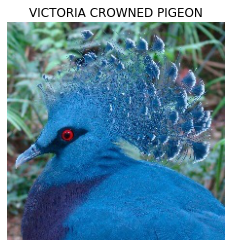

In [31]:
img = view_random_image(target_dir = "/kaggle/input/bird-species/train/",
                        target_class = "VICTORIA CROWNED PIGEON") # or we can write nike instead of converse to see converse examples

In [32]:
import tensorflow as tf
img.shape #(width, height, colour channels)

(224, 224, 3)

##### More visualization :D

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


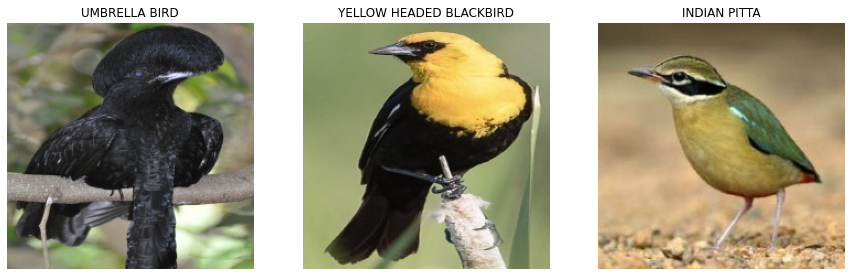

In [33]:
plt.figure(figsize = (15,7))
plt.subplot(1,3,1)
steak_image = view_random_image("/kaggle/input/bird-species/train/", "UMBRELLA BIRD")
plt.subplot(1,3,2)
pizza_image = view_random_image("/kaggle/input/bird-species/train/", "YELLOW HEADED BLACKBIRD")
plt.subplot(1,3,3)
pizza_image = view_random_image("/kaggle/input/bird-species/train/", "INDIAN PITTA")

## 2. Data Preprocessing

In [34]:
import matplotlib.pyplot as plt
import pathlib, os, random
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [35]:
train_dir = "/kaggle/input/bird-species/train/"
test_dir = "/kaggle/input/bird-species/test/"
val_dir = "/kaggle/input/bird-species/valid/"

In [36]:
# Rescale
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (224,224),
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical")

val_data = valid_datagen.flow_from_directory(directory = val_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical")


Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


## 3.Creating and fitting the Model

In [49]:
# 1. Create a base model with tf.keras.applications
base_model = tf.keras.applications.InceptionV3(include_top=False)
base_model.trainable = False  # 2. Freeze the base model

# 3. Input Layer
inputs = tf.keras.layers.Input(shape=(300, 300, 3), name="input-layer")

# 4. Pass inputs through base model
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_avg_pool")(x)

# 5. Add Dropout + Dense layer + Dropout again
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

# 6. Output Layer with L2 Regularization
from tensorflow.keras import regularizers
outputs = tf.keras.layers.Dense(525, activation="softmax",
                                 kernel_regularizer=regularizers.l2(0.001),
                                 name="output-layer")(x)

# 7. Create the model
model_0 = tf.keras.Model(inputs, outputs)

# 8. Compile the model with lower learning rate
model_0.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    metrics=["accuracy"]
)

# 9. Callbacks for EarlyStopping and LR Reduction
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# 10. Train the model
history = model_0.fit(
    train_data,
    epochs=15,
    steps_per_epoch=len(train_data),
    validation_data=val_data,
    validation_steps=int(0.25 * len(val_data)),
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/15
2645/2645 [==============================] - 394s 148ms/step - loss: 3.9854 - accuracy: 0.3038 - val_loss: 2.1761 - val_accuracy: 0.6234
Epoch 2/15
2645/2645 [==============================] - 328s 124ms/step - loss: 2.6612 - accuracy: 0.4923 - val_loss: 1.6218 - val_accuracy: 0.7328
Epoch 3/15
2645/2645 [==============================] - 294s 111ms/step - loss: 2.3209 - accuracy: 0.5469 - val_loss: 1.5202 - val_accuracy: 0.7297
Epoch 4/15
2645/2645 [==============================] - 306s 116ms/step - loss: 2.1508 - accuracy: 0.5702 - val_loss: 1.2881 - val_accuracy: 0.7656
Epoch 5/15
2645/2645 [==============================] - 319s 121ms/step - loss: 2.0453 - accuracy: 0.5890 - val_loss: 1.3005 - val_accuracy: 0.7703
Epoch 6/15
2645/2645 [==============================] - 361s 137ms/step - loss: 1.9731 - accuracy: 0.5989 - val_loss: 1.2343 - val_accuracy: 0.7828
Epoch 7/15
2645/2645 [==============================] - 355s 134ms/step - loss: 1.9111 - accuracy: 0.6087 - val_

In [50]:
model_0.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input-layer (InputLayer)     [(None, 300, 300, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, None, None, 2048)  21802784  
_________________________________________________________________
global_avg_pool (GlobalAvera (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
output-layer (Dense)         (None, 525)               5381

In [51]:
model_0.evaluate(test_data)

83/83 [==============================] - 11s 128ms/step - loss: 0.8075 - accuracy: 0.8739


[0.8075363636016846, 0.8739047646522522]

In [52]:
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure() 
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

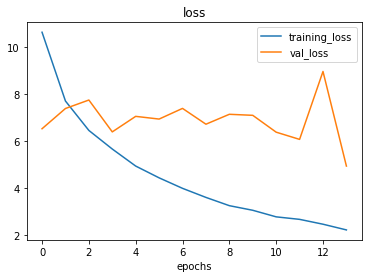

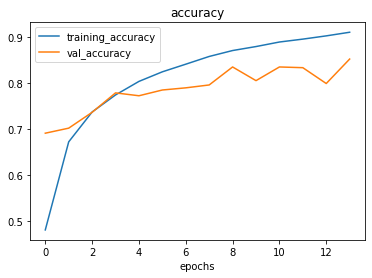

In [41]:
plot_loss_curves(history)

## 4. Freeze top layers of Base Model

In [53]:
# To begin fine-tuning lets start by setting the last 10 layers as trainable

base_model.trainable = True

# Un-freeze last 10 layers
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile (we have to compile model every time there is a change)
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), # when fine-tuning you typically want to lower lr by 10x
                 metrics = ["accuracy"] )

In [54]:
# Check which layers are trainable
for layer_number, layer in enumerate(model_0.layers[1].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 conv2d_188 False
2 batch_normalization_188 False
3 activation_188 False
4 conv2d_189 False
5 batch_normalization_189 False
6 activation_189 False
7 conv2d_190 False
8 batch_normalization_190 False
9 activation_190 False
10 max_pooling2d_8 False
11 conv2d_191 False
12 batch_normalization_191 False
13 activation_191 False
14 conv2d_192 False
15 batch_normalization_192 False
16 activation_192 False
17 max_pooling2d_9 False
18 conv2d_196 False
19 batch_normalization_196 False
20 activation_196 False
21 conv2d_194 False
22 conv2d_197 False
23 batch_normalization_194 False
24 batch_normalization_197 False
25 activation_194 False
26 activation_197 False
27 average_pooling2d_18 False
28 conv2d_193 False
29 conv2d_195 False
30 conv2d_198 False
31 conv2d_199 False
32 batch_normalization_193 False
33 batch_normalization_195 False
34 batch_normalization_198 False
35 batch_normalization_199 False
36 activation_193 False
37 activation_195 False
38 activation_198 False
39 activation

In [44]:
# Now we have unfrozen some of the layers on the top 
print(len(model_0.trainable_variables))

3


## 5. Fine-Tuning and Refitting

In [55]:
initial_epochs = 15
fine_tune_epochs = initial_epochs + 5

# Refit the model
history_2 = model_0.fit(train_data,
                       epochs = fine_tune_epochs,
                       validation_data = val_data,
                       validation_steps = int(0.25*len(val_data)),
                       initial_epoch =  history.epoch[-1],) # Start the epoch where it left before

Epoch 15/20
2645/2645 [==============================] - 330s 124ms/step - loss: 2.3887 - accuracy: 0.5540 - val_loss: 1.4228 - val_accuracy: 0.7844
Epoch 16/20
2645/2645 [==============================] - 286s 108ms/step - loss: 2.3789 - accuracy: 0.5551 - val_loss: 1.4009 - val_accuracy: 0.7625
Epoch 17/20
2645/2645 [==============================] - 287s 108ms/step - loss: 2.3252 - accuracy: 0.5571 - val_loss: 1.2365 - val_accuracy: 0.8000
Epoch 18/20
2645/2645 [==============================] - 285s 108ms/step - loss: 2.2805 - accuracy: 0.5611 - val_loss: 1.3258 - val_accuracy: 0.7672
Epoch 19/20
2645/2645 [==============================] - 292s 111ms/step - loss: 2.2649 - accuracy: 0.5618 - val_loss: 1.3039 - val_accuracy: 0.7734
Epoch 20/20
2645/2645 [==============================] - 302s 114ms/step - loss: 2.2508 - accuracy: 0.5605 - val_loss: 1.2175 - val_accuracy: 0.7922


In [56]:
model_0.evaluate(test_data)

83/83 [==============================] - 11s 135ms/step - loss: 1.1417 - accuracy: 0.8168


[1.1416512727737427, 0.8167619109153748]

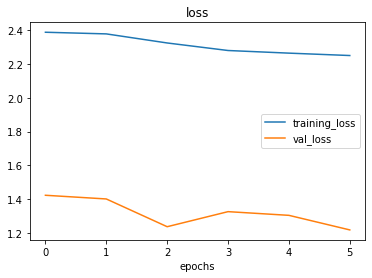

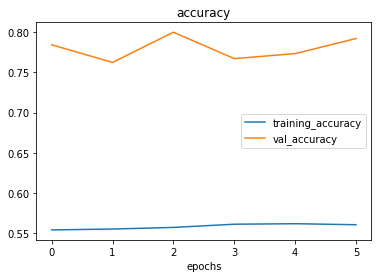

In [57]:
plot_loss_curves(history_2)

In [65]:
model_0.save("bird_species_model.h5")

In [60]:
import shutil
shutil.make_archive('bird_species_model', 'zip', 'bird_species_model')


FileNotFoundError: [Errno 2] No such file or directory: 'bird_species_model'